In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()
cancer_reg = pd.read_csv('cancer_reg.csv', encoding='latin-1')

Saving cancer_reg.csv to cancer_reg.csv


In [2]:
# fill nan values
for i in range(34):
    if cancer_reg.iloc[:,i].isnull().any():
        cancer_reg.iloc[:,i].fillna(cancer_reg.iloc[:,i].mean(),inplace=True)

In [3]:
missing_values = cancer_reg.isnull().sum()
print(missing_values)

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64


In [4]:
non_numeric_columns = cancer_reg.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['binnedInc', 'Geography'], dtype='object')


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to the 'Geography' column
cancer_reg['Geography'] = label_encoder.fit_transform(cancer_reg['Geography'])
cancer_reg['binnedInc'] = label_encoder.fit_transform(cancer_reg['binnedInc'])

In [6]:
print(cancer_reg.dtypes)

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                    int64
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                    int64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [7]:
import numpy as np
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = cancer_reg.drop(columns=['TARGET_deathRate'])
Y = cancer_reg['TARGET_deathRate']

Y_log = np.log1p(Y) #Apply log transformation to Y
X_log = np.log1p(X)  # Apply log transformation to X


# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_log, Y_log, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define lower and upper bounds for clipping
lower_bound = 0 # Set your desired lower bound
upper_bound = 1000  # Set your desired upper bound

# Standardize the input features (assuming X_train and X_val are already defined)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)


# Apply log transformation to training and test targets
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Clip the target variables to the specified range
y_train_clipped = np.clip(y_train_log, lower_bound, upper_bound)
y_val_clipped = np.clip(y_val_log, lower_bound, upper_bound)

In [8]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the testing data
y_pred = model.predict(X_val)
# Clip predictions to not go below 4.5
y_pred = np.clip(y_pred, 4.65, 5.6)  # None means no upper limit
# Clip predictions to not go below 4.5
y_val = np.clip(y_val, 4.65, 5.6)  # None means no upper limit

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate MSE using linear regression
mse = mean_squared_error(y_val, y_pred)
# Calculate R-squared
r_squared = r2_score(y_val, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

R-squared: 0.8252033424531783
Mean Squared Error: 0.00459287742457978


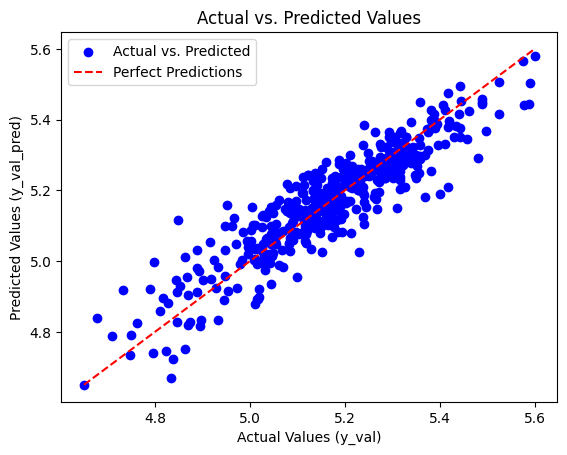

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already imported your necessary libraries and performed the previous steps

# Create a scatter plot
plt.scatter(y_val, y_pred, c='blue', marker='o', label='Actual vs. Predicted')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Perfect Predictions')

# Set axis labels and a title
plt.xlabel('Actual Values (y_val)')
plt.ylabel('Predicted Values (y_val_pred)')
plt.title('Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

15/15 [==============================] - 0s 1ms/step
LR: 0.1, Mean Squared Error: 0.007665971945033674
LR: 0.1, R2: 0.708246889919516


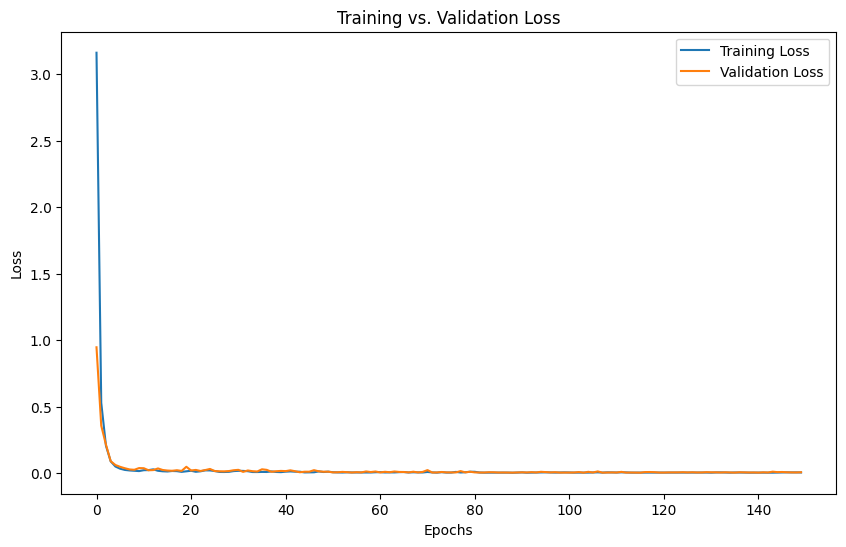

In [14]:
from keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Define a single learning rate
lr = 0.1

# Create the model
model1 = Sequential()
model1.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model1.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model1.fit(X_train_scaled, y_train, epochs=150, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=0)

# Make predictions on the validation data
y_pred_log = model1.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/600
34/34 [==============================] - 1s 3ms/step - loss: 13.9718 - mae: 3.3374
Epoch 2/600
34/34 [==============================] - 0s 4ms/step - loss: 2.6341 - mae: 1.3009
Epoch 3/600
34/34 [==============================] - 0s 2ms/step - loss: 1.2633 - mae: 0.8832
Epoch 4/600
34/34 [==============================] - 0s 2ms/step - loss: 0.7436 - mae: 0.6684
Epoch 5/600
34/34 [==============================] - 0s 2ms/step - loss: 0.5048 - mae: 0.5508
Epoch 6/600
34/34 [==============================] - 0s 2ms/step - loss: 0.3632 - mae: 0.4671
Epoch 7/600
34/34 [==============================] - 0s 2ms/step - loss: 0.2590 - mae: 0.3917
Epoch 8/600
34/34 [==============================] - 0s 1ms/step - loss: 0.1936 - mae: 0.3357
Epoch 9/600
34/34 [==============================] - 0s 2ms/step - loss: 0.1490 - mae: 0.2969
Epoch 10/600
34/34 [==============================] - 0s 2ms/step - loss: 0.1267 - mae: 0.2738
Epoch 11/600
34/34 [==============================] - 0s 2

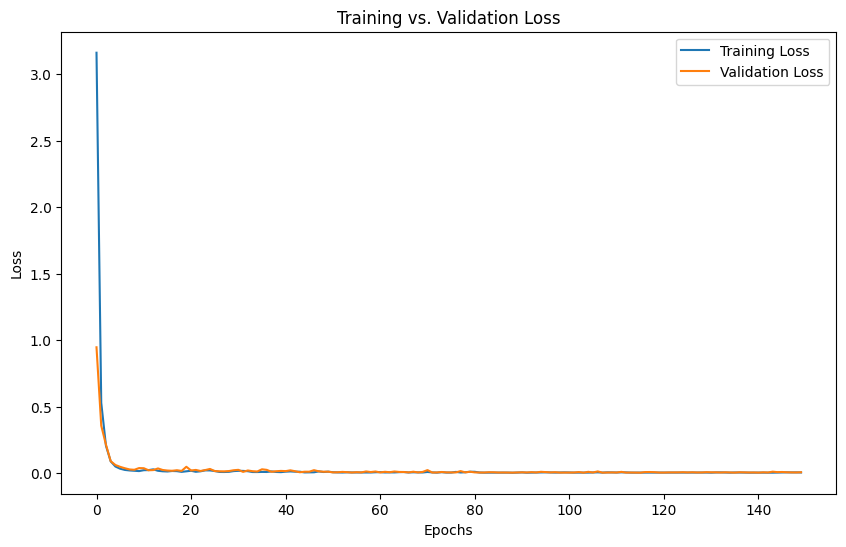

In [15]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Apply log transformation to training and test targets
#y_train_log = np.log1p(y_train)
#y_test_log = np.log1p(y_test)

# Define a list of learning rates
learning_rates = [0.01]

# Loop through different learning rates
for lr in learning_rates:
    # Create the model
    model2 = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(33,), name='hidden_layer1'),
        keras.layers.Dense(1, activation='linear', name='output_layer')
    ])

    # Create the optimizer with the specified learning rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)

    # Compile the model with mean squared error loss and the optimizer
    model2.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

    # Train the model
    model2.fit(X_train_scaled, y_train, epochs=600, batch_size=64, verbose=1)

    # Make predictions on the test data
    y_pred_log = model2.predict(X_val_scaled)

    # Calculate the mean squared error
    mse = mean_squared_error(y_val, y_pred_log)
    r2 = r2_score(y_val, y_pred_log)

    # Print the learning rate and MSE
    print(f'LR: {lr}, Mean Squared Error: {mse}')
    print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/1000
67/67 [==============================] - 1s 2ms/step - loss: 26.4466 - mae: 5.0588
Epoch 2/1000
67/67 [==============================] - 0s 2ms/step - loss: 14.2996 - mae: 3.5811
Epoch 3/1000
67/67 [==============================] - 0s 1ms/step - loss: 8.0797 - mae: 2.5336
Epoch 4/1000
67/67 [==============================] - 0s 2ms/step - loss: 5.3360 - mae: 1.9862
Epoch 5/1000
67/67 [==============================] - 0s 2ms/step - loss: 3.8743 - mae: 1.6555
Epoch 6/1000
67/67 [==============================] - 0s 2ms/step - loss: 2.9708 - mae: 1.4256
Epoch 7/1000
67/67 [==============================] - 0s 2ms/step - loss: 2.4442 - mae: 1.2767
Epoch 8/1000
67/67 [==============================] - 0s 2ms/step - loss: 2.1010 - mae: 1.1720
Epoch 9/1000
67/67 [==============================] - 0s 2ms/step - loss: 1.8448 - mae: 1.0881
Epoch 10/1000
67/67 [==============================] - 0s 2ms/step - loss: 1.6341 - mae: 1.0177
Epoch 11/1000
67/67 [==========================

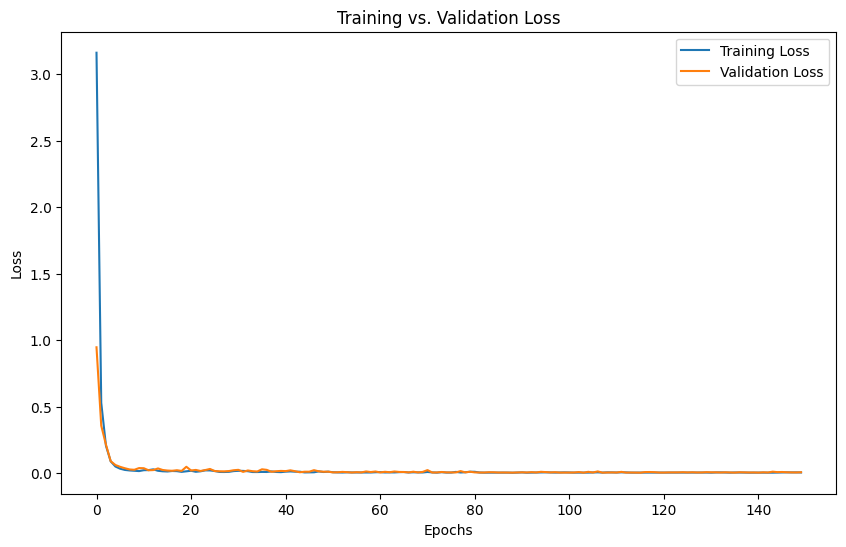

In [16]:

# Define a list of learning rates
learning_rates = [0.001]

# Loop through different learning rates
for lr in learning_rates:
    # Create the model
    model3 = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(33,), name='hidden_layer1'),
        keras.layers.Dense(1, activation='linear', name='output_layer')
    ])

    # Create the optimizer with the specified learning rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)

    # Compile the model with mean squared error loss and the optimizer
    model3.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

    # Train the model
    model3.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, verbose=1)

    # Make predictions on the test data
    y_pred_log = model3.predict(X_val_scaled)

    # Calculate the mean squared error
    mse = mean_squared_error(y_val, y_pred_log)
    r2 = r2_score(y_val, y_pred_log)

    # Print the learning rate and MSE
    print(f'LR: {lr}, Mean Squared Error: {mse}')
    print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/1000
134/134 [==============================] - 1s 2ms/step - loss: 24.6764 - mae: 4.9277
Epoch 2/1000
134/134 [==============================] - 0s 2ms/step - loss: 22.6031 - mae: 4.7023
Epoch 3/1000
134/134 [==============================] - 0s 3ms/step - loss: 20.6364 - mae: 4.4756
Epoch 4/1000
134/134 [==============================] - 1s 5ms/step - loss: 18.7383 - mae: 4.2413
Epoch 5/1000
134/134 [==============================] - 0s 3ms/step - loss: 16.8995 - mae: 4.0009
Epoch 6/1000
134/134 [==============================] - 1s 5ms/step - loss: 15.1255 - mae: 3.7539
Epoch 7/1000
134/134 [==============================] - 0s 4ms/step - loss: 13.4463 - mae: 3.5065
Epoch 8/1000
134/134 [==============================] - 0s 3ms/step - loss: 11.8834 - mae: 3.2624
Epoch 9/1000
134/134 [==============================] - 1s 5ms/step - loss: 10.4622 - mae: 3.0277
Epoch 10/1000
134/134 [==============================] - 1s 6ms/step - loss: 9.1955 - mae: 2.8085
Epoch 11/1000
134/13

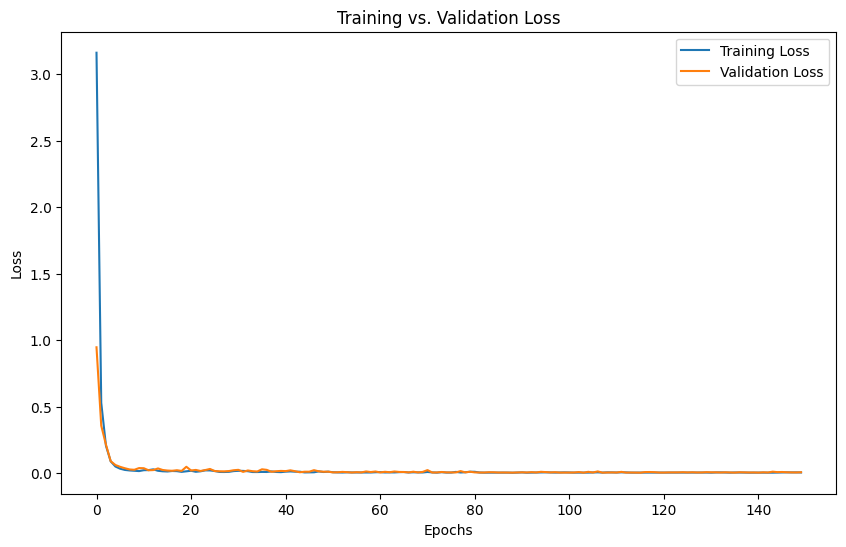

In [17]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Apply log transformation to training and test targets
#y_train_log = np.log1p(y_train)
#y_test_log = np.log1p(y_test)

# Define a list of learning rates
learning_rates = [0.0001]

# Loop through different learning rates
for lr in learning_rates:
    # Create the model
    model4 = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(33,), name='hidden_layer1'),
        keras.layers.Dense(1, activation='linear', name='output_layer')
    ])

    # Create the optimizer with the specified learning rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)

    # Compile the model with mean squared error loss and the optimizer
    model4.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

    # Train the model
    model4.fit(X_train_scaled, y_train, epochs=1000, batch_size=16, verbose=1)

    # Make predictions on the test data
    y_pred_log = model4.predict(X_val_scaled)

    # Calculate the mean squared error
    mse = mean_squared_error(y_val, y_pred_log)
    r2 = r2_score(y_val, y_pred_log)

    # Print the learning rate and MSE
    print(f'LR: {lr}, Mean Squared Error: {mse}')
    print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 3.0865 - mae: 1.2628 - val_loss: 0.6786 - val_mae: 0.6328
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 0.3693 - mae: 0.4677 - val_loss: 0.2028 - val_mae: 0.3579
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1617 - mae: 0.3149 - val_loss: 0.1385 - val_mae: 0.2907
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0824 - mae: 0.2236 - val_loss: 0.0815 - val_mae: 0.2185
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 0.0778 - mae: 0.2211 - val_loss: 0.1176 - val_mae: 0.2655
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 0.0595 - mae: 0.1948 - val_loss: 0.0604 - val_mae: 0.1912
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 0.0341 - mae: 0.1457 - val_loss: 0.0437 - val_mae: 0.1559
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 0.0276 - m

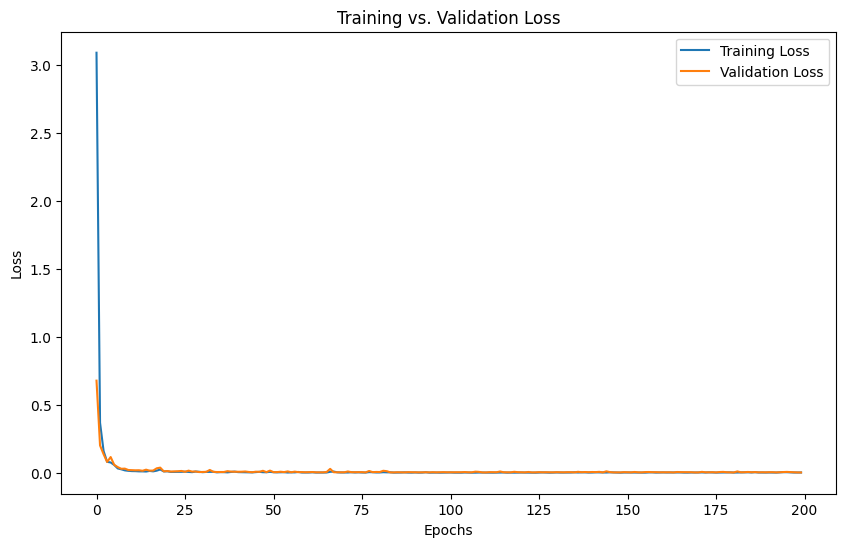

In [18]:


# Define a single learning rate
lr = 0.1

# Create the model
model5 = Sequential()
model5.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model5.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model5.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model5.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model5.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model5.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 0s 1ms/step
LR: 0.01, Mean Squared Error: 0.006916929785054803
LR: 0.01, R2: 0.7367540878746058


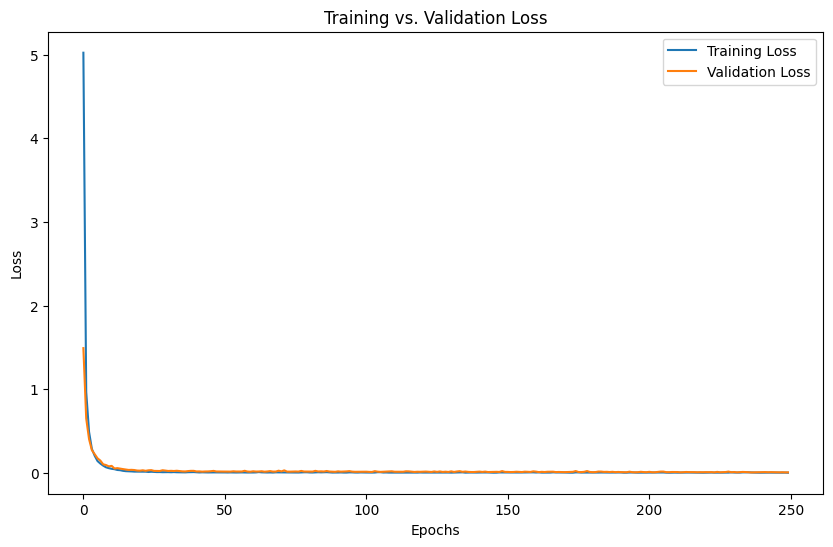

In [19]:

# Define a single learning rate
lr = 0.01

# Create the model
model6 = Sequential()
model6.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model6.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model6.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model6.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model6.fit(X_train_scaled, y_train, epochs=250, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=0)

# Make predictions on the validation data
y_pred_log = model6.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/600
34/34 [==============================] - 3s 20ms/step - loss: 30.4999 - mae: 5.4947 - val_loss: 25.0868 - val_mae: 4.9945
Epoch 2/600
34/34 [==============================] - 0s 4ms/step - loss: 21.8113 - mae: 4.6340 - val_loss: 17.6140 - val_mae: 4.1281
Epoch 3/600
34/34 [==============================] - 0s 3ms/step - loss: 13.8336 - mae: 3.5901 - val_loss: 9.1975 - val_mae: 2.8243
Epoch 4/600
34/34 [==============================] - 0s 3ms/step - loss: 5.6864 - mae: 2.1061 - val_loss: 3.6373 - val_mae: 1.5969
Epoch 5/600
34/34 [==============================] - 0s 3ms/step - loss: 2.9670 - mae: 1.4137 - val_loss: 2.7902 - val_mae: 1.3792
Epoch 6/600
34/34 [==============================] - 0s 5ms/step - loss: 2.3194 - mae: 1.2419 - val_loss: 2.2463 - val_mae: 1.2373
Epoch 7/600
34/34 [==============================] - 0s 4ms/step - loss: 1.8941 - mae: 1.1207 - val_loss: 1.8765 - val_mae: 1.1327
Epoch 8/600
34/34 [==============================] - 0s 5ms/step - loss: 1.60

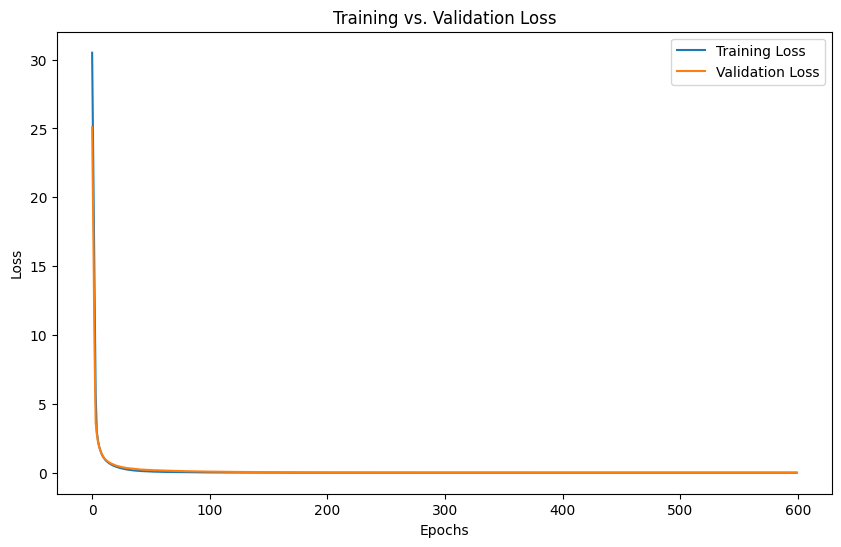

In [20]:
from keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Define a single learning rate
lr = 0.001

# Create the model
model7 = Sequential()
model7.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model7.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model7.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model7.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model7.fit(X_train_scaled, y_train, epochs=600, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model7.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/800
67/67 [==============================] - 1s 3ms/step - loss: 25.5650 - mae: 5.0296 - val_loss: 24.4931 - val_mae: 4.9193
Epoch 2/800
67/67 [==============================] - 0s 2ms/step - loss: 23.6133 - mae: 4.8297 - val_loss: 22.5342 - val_mae: 4.7119
Epoch 3/800
67/67 [==============================] - 0s 2ms/step - loss: 21.6465 - mae: 4.6161 - val_loss: 20.5144 - val_mae: 4.4850
Epoch 4/800
67/67 [==============================] - 0s 2ms/step - loss: 19.5843 - mae: 4.3774 - val_loss: 18.3956 - val_mae: 4.2307
Epoch 5/800
67/67 [==============================] - 0s 2ms/step - loss: 17.4707 - mae: 4.1166 - val_loss: 16.3005 - val_mae: 3.9574
Epoch 6/800
67/67 [==============================] - 0s 2ms/step - loss: 15.3600 - mae: 3.8334 - val_loss: 14.2622 - val_mae: 3.6712
Epoch 7/800
67/67 [==============================] - 0s 2ms/step - loss: 13.3239 - mae: 3.5332 - val_loss: 12.3453 - val_mae: 3.3753
Epoch 8/800
67/67 [==============================] - 0s 2ms/step - lo

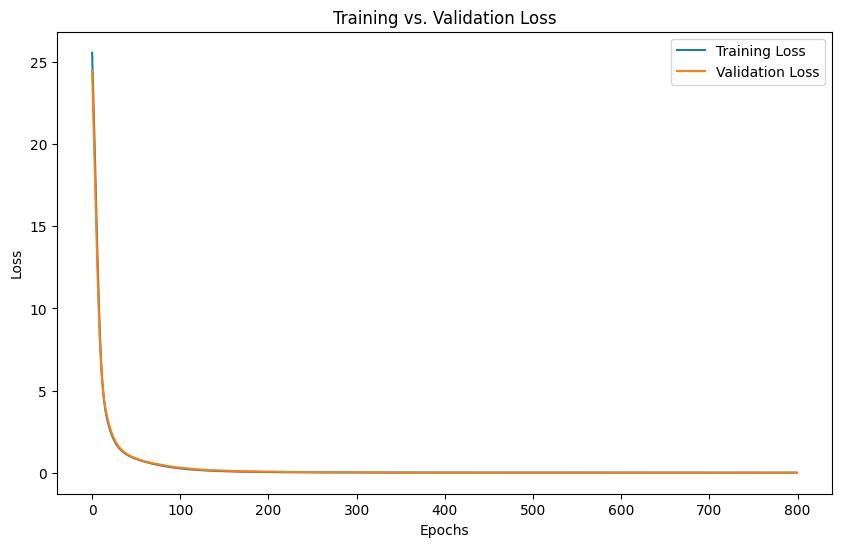

In [ ]:

# Define a single learning rate
lr = 0.0001

# Create the model
model8 = Sequential()
model8.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model8.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model8.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model8.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model8.fit(X_train_scaled, y_train, epochs=800, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model8.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
34/34 [==============================] - 2s 8ms/step - loss: 4.6521 - mae: 1.5870 - val_loss: 1.0170 - val_mae: 0.8507
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4284 - mae: 0.5098 - val_loss: 0.1591 - val_mae: 0.3234
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0889 - mae: 0.2333 - val_loss: 0.0430 - val_mae: 0.1661
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0368 - mae: 0.1494 - val_loss: 0.0212 - val_mae: 0.1127
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0214 - mae: 0.1114 - val_loss: 0.0271 - val_mae: 0.1275
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0185 - mae: 0.1042 - val_loss: 0.0170 - val_mae: 0.0994
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0192 - mae: 0.1061 - val_loss: 0.0200 - val_mae: 0.1091
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0181 - m

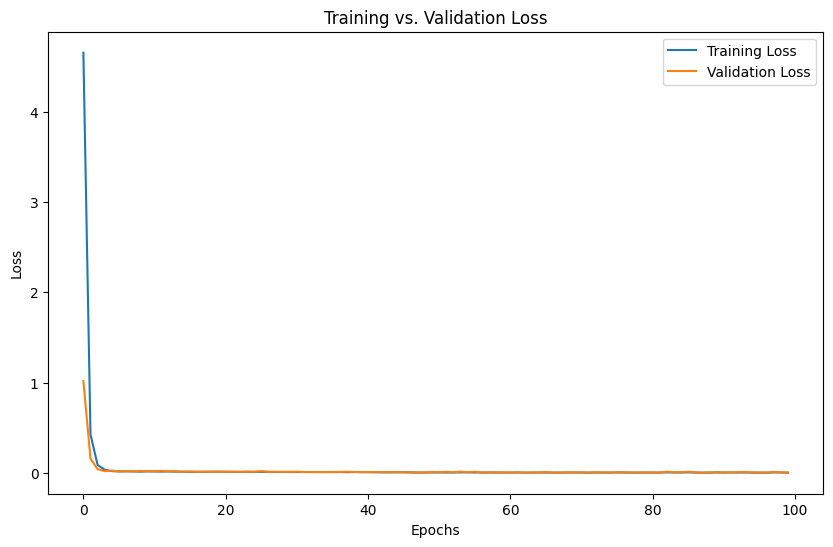

In [27]:
from keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Define a single learning rate
lr = 0.1

# Create the model
model9 = Sequential()
model9.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model9.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model9.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model9.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model9.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model9.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model9.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
34/34 [==============================] - 2s 8ms/step - loss: 3.3873 - mae: 1.3916 - val_loss: 0.9596 - val_mae: 0.8114
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 0.6135 - mae: 0.6077 - val_loss: 0.4276 - val_mae: 0.5036
Epoch 3/400
34/34 [==============================] - 0s 3ms/step - loss: 0.3151 - mae: 0.4342 - val_loss: 0.2639 - val_mae: 0.3984
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 0.1912 - mae: 0.3403 - val_loss: 0.1622 - val_mae: 0.3072
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 0.1226 - mae: 0.2695 - val_loss: 0.1214 - val_mae: 0.2747
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0839 - mae: 0.2257 - val_loss: 0.0925 - val_mae: 0.2310
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0607 - mae: 0.1937 - val_loss: 0.0958 - val_mae: 0.2432
Epoch 8/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0491 - m

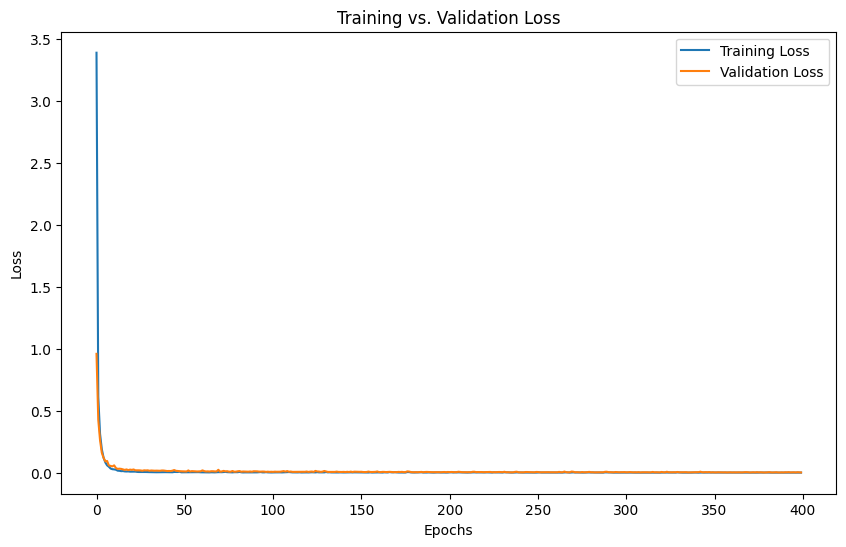

In [28]:
from keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Define a single learning rate
lr = 0.01

# Create the model
model10 = Sequential()
model10.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model10.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model10.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model10.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model10.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model10.fit(X_train_scaled, y_train, epochs=400, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model10.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 0s 2ms/step
LR: 0.001, Mean Squared Error: 0.011189448637259122
LR: 0.001, R2: 0.5741497016407564


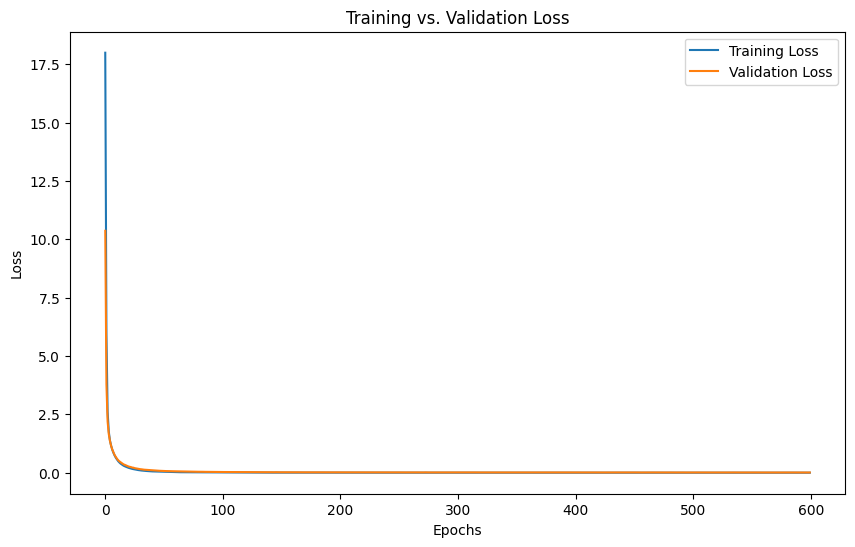

In [29]:
from keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Define a single learning rate
lr = 0.001

# Create the model
model11 = Sequential()
model11.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model11.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model11.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model11.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model11.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model11.fit(X_train_scaled, y_train, epochs=600, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=0)

# Make predictions on the validation data
y_pred_log = model11.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/1000
34/34 [==============================] - 2s 16ms/step - loss: 23.4818 - mae: 4.8238 - val_loss: 22.6088 - val_mae: 4.7315
Epoch 2/1000
34/34 [==============================] - 0s 8ms/step - loss: 22.1167 - mae: 4.6793 - val_loss: 21.1631 - val_mae: 4.5752
Epoch 3/1000
34/34 [==============================] - 0s 6ms/step - loss: 20.6496 - mae: 4.5169 - val_loss: 19.5915 - val_mae: 4.3981
Epoch 4/1000
34/34 [==============================] - 0s 8ms/step - loss: 19.0227 - mae: 4.3303 - val_loss: 17.8752 - val_mae: 4.1952
Epoch 5/1000
34/34 [==============================] - 0s 9ms/step - loss: 17.2620 - mae: 4.1182 - val_loss: 16.0852 - val_mae: 3.9714
Epoch 6/1000
34/34 [==============================] - 0s 7ms/step - loss: 15.4687 - mae: 3.8889 - val_loss: 14.3002 - val_mae: 3.7327
Epoch 7/1000
34/34 [==============================] - 0s 6ms/step - loss: 13.7062 - mae: 3.6468 - val_loss: 12.5574 - val_mae: 3.4812
Epoch 8/1000
34/34 [==============================] - 0s 5ms/

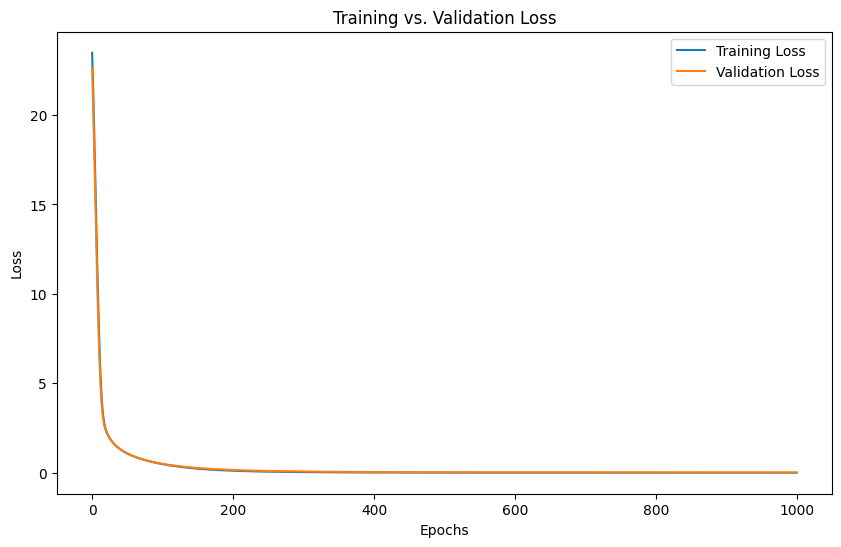

In [31]:
from keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Define a single learning rate
lr = 0.0001

# Create the model
model12 = Sequential()
model12.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model12.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model12.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model12.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model12.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model12.fit(X_train_scaled, y_train, epochs=1000, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model12.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
34/34 [==============================] - 3s 18ms/step - loss: 3.8136 - mae: 1.3666 - val_loss: 0.3551 - val_mae: 0.4840
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2265 - mae: 0.3662 - val_loss: 0.1210 - val_mae: 0.2733
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0899 - mae: 0.2325 - val_loss: 0.0678 - val_mae: 0.2067
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0452 - mae: 0.1644 - val_loss: 0.0405 - val_mae: 0.1608
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0277 - mae: 0.1290 - val_loss: 0.0255 - val_mae: 0.1218
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0198 - mae: 0.1086 - val_loss: 0.0220 - val_mae: 0.1190
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0160 - mae: 0.0981 - val_loss: 0.0237 - val_mae: 0.1162
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0143 - 

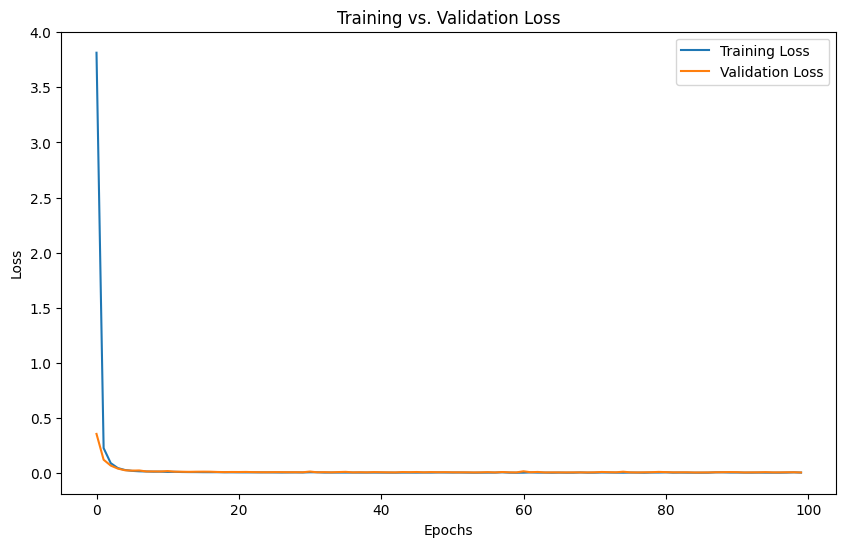

In [42]:
# Define a single learning rate
lr = 0.1

# Create the model
model13 = Sequential()
model13.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model13.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model13.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model13.add(Dense(4,activation='relu', input_dim=X_train.shape[1]))
model13.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model13.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model13.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model13.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/300
34/34 [==============================] - 1s 10ms/step - loss: 5.1954 - mae: 1.7533 - val_loss: 0.9289 - val_mae: 0.7768
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 0.6537 - mae: 0.6363 - val_loss: 0.4062 - val_mae: 0.4986
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 0.3142 - mae: 0.4348 - val_loss: 0.2555 - val_mae: 0.3981
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1938 - mae: 0.3414 - val_loss: 0.1992 - val_mae: 0.3431
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 0.1302 - mae: 0.2796 - val_loss: 0.1327 - val_mae: 0.2804
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 0.0899 - mae: 0.2326 - val_loss: 0.0987 - val_mae: 0.2394
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.2040 - val_loss: 0.0899 - val_mae: 0.2293
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 0.0528 - 

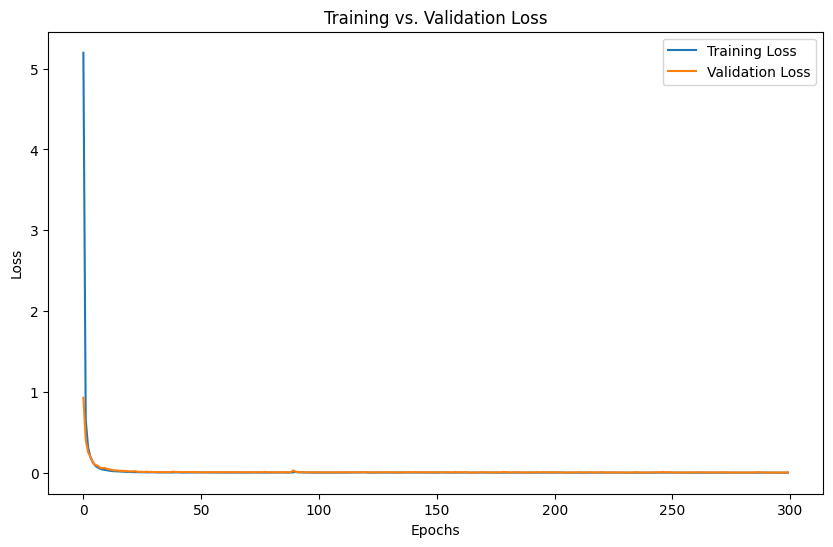

In [43]:
# Define a single learning rate
lr = 0.01

# Create the model
model14 = Sequential()
model14.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model14.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model14.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model14.add(Dense(4,activation='relu', input_dim=X_train.shape[1]))
model14.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model14.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model14.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model14.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/600
34/34 [==============================] - 2s 9ms/step - loss: 28.2806 - mae: 5.3115 - val_loss: 26.4605 - val_mae: 5.1412
Epoch 2/600
34/34 [==============================] - 0s 4ms/step - loss: 26.2155 - mae: 5.1176 - val_loss: 25.6589 - val_mae: 5.0628
Epoch 3/600
34/34 [==============================] - 0s 3ms/step - loss: 25.0568 - mae: 5.0028 - val_loss: 23.8426 - val_mae: 4.8797
Epoch 4/600
34/34 [==============================] - 0s 3ms/step - loss: 21.7765 - mae: 4.6577 - val_loss: 17.9562 - val_mae: 4.2230
Epoch 5/600
34/34 [==============================] - 0s 4ms/step - loss: 11.6043 - mae: 3.2520 - val_loss: 4.2326 - val_mae: 1.7947
Epoch 6/600
34/34 [==============================] - 0s 3ms/step - loss: 2.9042 - mae: 1.3998 - val_loss: 2.2969 - val_mae: 1.2397
Epoch 7/600
34/34 [==============================] - 0s 4ms/step - loss: 1.9505 - mae: 1.1494 - val_loss: 1.6864 - val_mae: 1.0521
Epoch 8/600
34/34 [==============================] - 0s 3ms/step - loss: 1

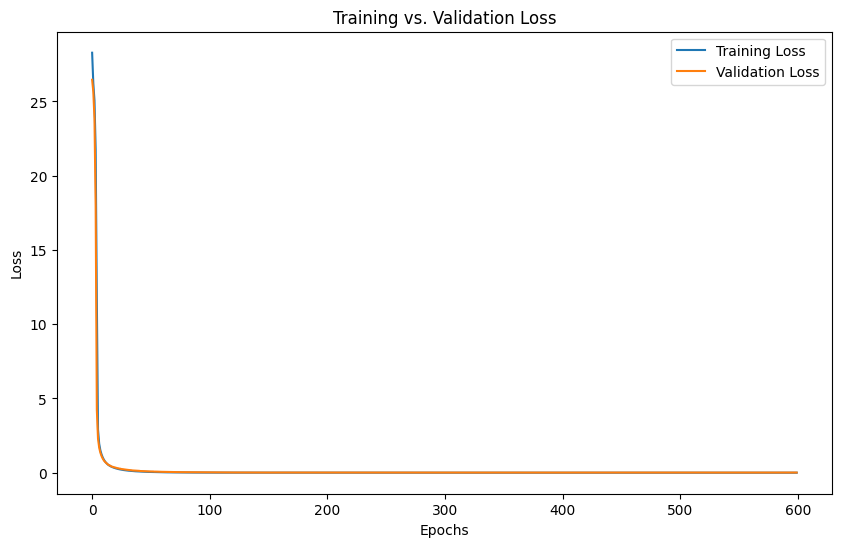

In [44]:
# Define a single learning rate
lr = 0.001

# Create the model
model15 = Sequential()
model15.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model15.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model15.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model15.add(Dense(4,activation='relu', input_dim=X_train.shape[1]))
model15.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model15.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model15.fit(X_train_scaled, y_train, epochs=600, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the validation data
y_pred_log = model15.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 0s 2ms/step
LR: 0.0001, Mean Squared Error: 0.01328626382701416
LR: 0.0001, R2: 0.4943486852450011


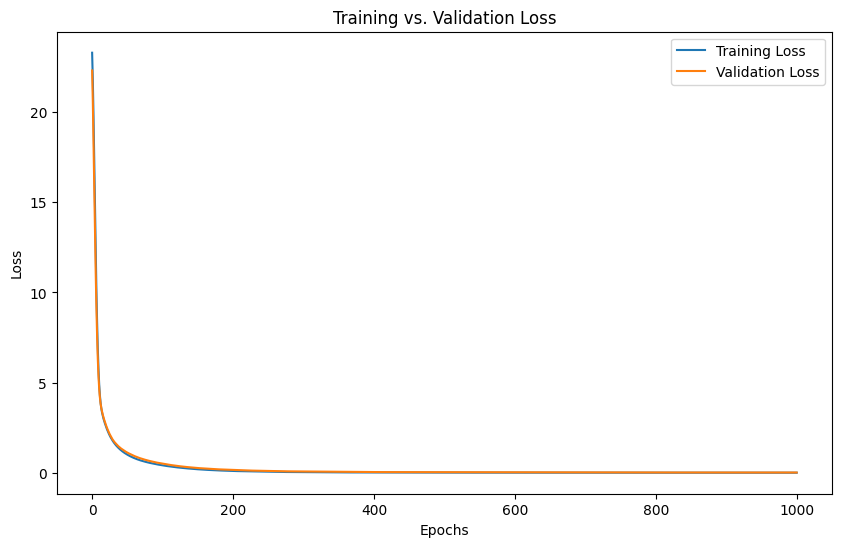

In [47]:
# Define a single learning rate
lr = 0.0001

# Create the model
model16 = Sequential()
model16.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model16.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model16.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model16.add(Dense(4,activation='relu', input_dim=X_train.shape[1]))
model16.add(Dense(1))

# Create the optimizer with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

# Compile the model with mean squared error loss and the optimizer
model16.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the model
history=model16.fit(X_train_scaled, y_train, epochs=1000, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=0)

# Make predictions on the validation data
y_pred_log = model16.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_log)
r2 = r2_score(y_val, y_pred_log)

# Print the results
print(f'LR: {lr}, Mean Squared Error: {mse}')
print(f'LR: {lr}, R2: {r2}')

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()